# Building Data Genome Project 2.0
## Exploratory data analysis of metadata

Biam! (pic.biam@gmail.com)

In [1]:
# data and numbers
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pylab
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
mpl.style.use('ggplot')

import gc

# Dataset

**Buildings metadata**

* <code>building_id</code>: building code-name with the structure <i>UniqueFirstName_SiteID_primaryspaceusage</i>.
* <code>site_id</code>: animal-code-name for the site.
* <code>primaryspaceusage</code>: Primary space usage of all buildings is mapped using the <a href="https://www.energystar.gov/buildings/facility-owners-and-managers/existing-buildings/use-portfolio-manager/identify-your-property-type" rel="nofollow">energystar scheme building description types</a>. 
* <code>sqft</code>: Floor area of building in square feet (sq ft). 
* <code>lat</code>: Latitude of building location to city level.
* <code>lng</code>: Longitude of building location to city level.
* <code>electricity</code>: presence of this kind of meter in the building. <code>Yes</code> if affirmative, <code>NaN</code> if negative.
* <code>hotwater</code>: presence of this kind of meter in the building. <code>Yes</code> if affirmative, <code>NaN</code> if negative.
* <code>chilledwater</code>: presence of this kind of meter in the building. <code>Yes</code> if affirmative, <code>NaN</code> if negative.
* <code>steam</code>: presence of this kind of meter in the building. <code>Yes</code> if affirmative, <code>NaN</code> if negative.
* <code>water</code>: presence of this kind of meter in the building. <code>Yes</code> if affirmative, <code>NaN</code> if negative.
* <code>irrigation</code>: presence of this kind of meter in the building. <code>Yes</code> if affirmative, <code>NaN</code> if negative.
* <code>solar</code>: presence of this kind of meter in the building. <code>Yes</code> if affirmative, <code>NaN</code> if negative.
* <code>gas</code>: presence of this kind of meter in the building. <code>Yes</code> if affirmative, <code>NaN</code> if negative./li>
* <code>yearbuilt</code>: Year corresponding to when building was first constructed, in the format YYYY.
* <code>numberoffloors</code>: Number of floors corresponding to building.
* <code>date_opened</code>: Date building was opened for use, in the format D/M/YYYY.
* <code>sub_primaryspaceusage</code>: <a href="https://www.energystar.gov/buildings/facility-owners-and-managers/existing-buildings/use-portfolio-manager/identify-your-property-type" rel="nofollow">energystar scheme building description types</a> subcategory.
* <code>energystarscore</code>: Rating of building corresponding to building energystar scheme ([Energy Star Score](https://www.energystar.gov/buildings/facility-owners-and-managers/existing-buildings/use-portfolio-manager/understand-metrics/how-1-100)).
* <code>eui</code>: [Energy use intensity](https://www.energystar.gov/buildings/facility-owners-and-managers/existing-buildings/use-portfolio-manager/understand-metrics/what-energy) of the building (kWh/year/m2).
* <code>heatingtype</code>: Type of heating in corresponding building.
* <code>industry</code>: Industry type corresponding to building.
* <code>leed_level</code>: LEED rating of the building ([Leadership in Energy and Environmental Design](https://en.wikipedia.org/wiki/Leadership_in_Energy_and_Environmental_Design")), most widely used green building rating system.
* <code>occupants</code>: Usual number of occupants in the building.
* <code>rating</code>: Other building energy ratings.
* <code>site_eui</code>: Energy (Consumed/Purchased) use intensity of the site (kWh/year/m2).
* <code>source_eui</code>: Total primary energy consumption normalized by area (Takes into account conversion efficiency of primary energy into secondary energy).
* <code>sqm</code>: Floor area of the building in squared meters.
* <code>subindustry</code>: More detailed breakdown of Industry type corresponding to building.
* <code>timezone</code>: site time zone.

In [2]:
path = "..\\data\\metadata\\"

In [3]:
# Buildings data
metadata = pd.read_csv(path + "metadata.csv")
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   building_id            1636 non-null   object 
 1   site_id                1636 non-null   object 
 2   primaryspaceusage      1615 non-null   object 
 3   sqft                   1636 non-null   float64
 4   lat                    1458 non-null   float64
 5   lng                    1458 non-null   float64
 6   electricity            1578 non-null   object 
 7   hotwater               185 non-null    object 
 8   chilledwater           555 non-null    object 
 9   steam                  370 non-null    object 
 10  water                  146 non-null    object 
 11  irrigation             37 non-null     object 
 12  solar                  5 non-null      object 
 13  gas                    177 non-null    object 
 14  yearbuilt              817 non-null    float64
 15  numb

# Exploratory Data Analysis

## Missing values

In [4]:
# Percentage of missing values in each feature
round(metadata.isna().sum()/len(metadata)*100,2)

building_id               0.00
site_id                   0.00
primaryspaceusage         1.28
sqft                      0.00
lat                      10.88
lng                      10.88
electricity               3.55
hotwater                 88.69
chilledwater             66.08
steam                    77.38
water                    91.08
irrigation               97.74
solar                    99.69
gas                      89.18
yearbuilt                50.06
numberoffloors           73.04
sub_primaryspaceusage     1.28
date_opened              98.72
energystarscore          90.04
eui                      81.72
heatingtype              86.86
industry                 64.61
leed_level               91.69
occupants                85.94
rating                   88.75
site_eui                 90.04
source_eui               90.04
sqm                      73.29
subindustry              64.61
timezone                  0.00
dtype: float64

## Categories

In [5]:
cat = ["site_id","primaryspaceusage","sub_primaryspaceusage","industry","subindustry","timezone"]

col = []
for feature in cat:
    col_list = list(metadata[feature].unique())
    len_col_list = len(list(metadata[feature].unique()))
    col_list.insert(0, len_col_list)
    col.append(col_list)


In [6]:
cat_df = pd.DataFrame.from_records(col).T.rename(
    columns={
        0: "site_id",
        1: "primaryspaceusage",
        2: "sub_primaryspaceusage",
        3: "industry",
        4: "subindustry",
        5: "timezone",
    }
)

In [7]:
cat_df

,site_id,primaryspaceusage,sub_primaryspaceusage,industry,subindustry,timezone
0,19,17,105,5,13,6
1,Panther,Lodging/residential,Residence Hall,NaN,NaN,US/Eastern
2,Robin,Education,Research,Education,College/University,Europe/London
3,Fox,Office,Office,Government,Animal Control,US/Mountain
4,Rat,Entertainment/public assembly,Classroom,Hospitality,Public Assembly,US/Pacific
...,...,...,...,...,...,...
101,None,None,Data Center,None,None,None
102,None,None,Religious building,None,None,None
103,None,None,Services Plant,None,None,None
104,None,None,Ice arena,None,None,None


In [8]:
cat_df.to_csv("cat_df.csv", index=False)

## Sites location

In [9]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [10]:
# World map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# Exclude Antartica
world = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]
# Coordinate reference system used in this map
world.crs

{'init': 'epsg:4326'}

Latitude and longitude are of the site location (all buildings from the same location shares <code>lng</code> and <code>lat</code> values).

In [11]:
# All the sites
sites = metadata[["site_id","lat","lng"]].groupby("site_id").median()
# Converts lat and lng to geometry objects
geometry = [Point(xy) for xy in zip (sites["lng"], sites["lat"])]
# Creates geoDataFrame
geo_sites = gpd.GeoDataFrame(sites, crs = world.crs, geometry = geometry)
geo_sites

,lat,lng,geometry
site_id,,,
Bear,37.871903,-122.260729,POINT (-122.261 37.872)
Bobcat,NaN,NaN,POINT (nan nan)
Bull,30.267200,-97.743100,POINT (-97.743 30.267)
Cockatoo,42.459837,-76.485292,POINT (-76.485 42.460)
Crow,45.387600,-75.696000,POINT (-75.696 45.388)
Eagle,NaN,NaN,POINT (nan nan)
Fox,33.424425,-111.928140,POINT (-111.928 33.424)
Gator,NaN,NaN,POINT (nan nan)
Hog,44.978782,-93.255398,POINT (-93.255 44.979)


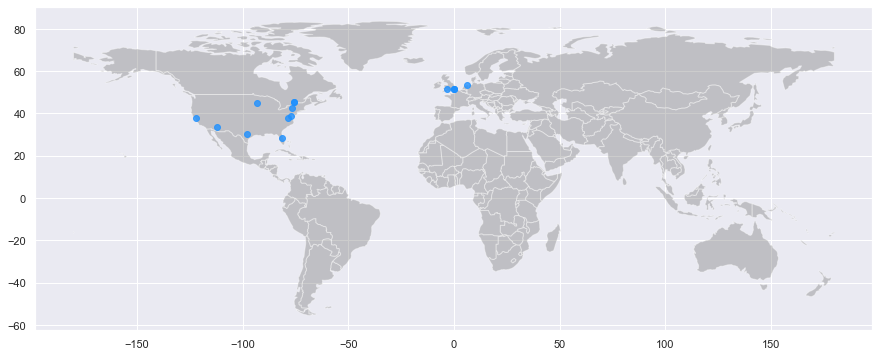

In [12]:
# Plot
sns.set(font_scale = 1)
fig, ax = plt.subplots(figsize = (15,15))
world.plot(ax = ax, alpha = 0.4, color = "grey")
geo_sites.plot(ax = ax, alpha = 0.8, color = "dodgerblue")

In [13]:
fig.savefig("..\\figures\\map.pdf", bbox_inches='tight')
fig.savefig("..\\figures\\map.png", dpi=72, bbox_inches='tight')

(20, 60)

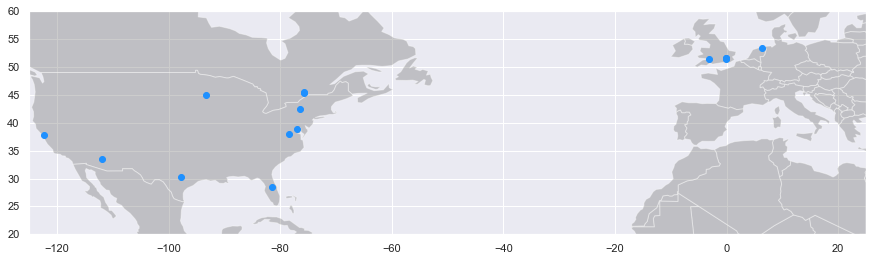

In [14]:
# Zoom Plot
fig, ax = plt.subplots(figsize = (15,15))
world.plot(ax = ax, alpha = 0.4, color = "grey")
geo_sites.plot(ax = ax, color = "dodgerblue")
ax.set_xlim([-125, 25])
ax.set_ylim([20, 60])

## Features frequency plots

In [15]:
len(np.unique(metadata["building_id"]))

1636

In [16]:
# colors = ["crimson","mediumvioletred","orangered","gold","yellowgreen","lightseagreen","royalblue","rebeccapurple","slategray"]

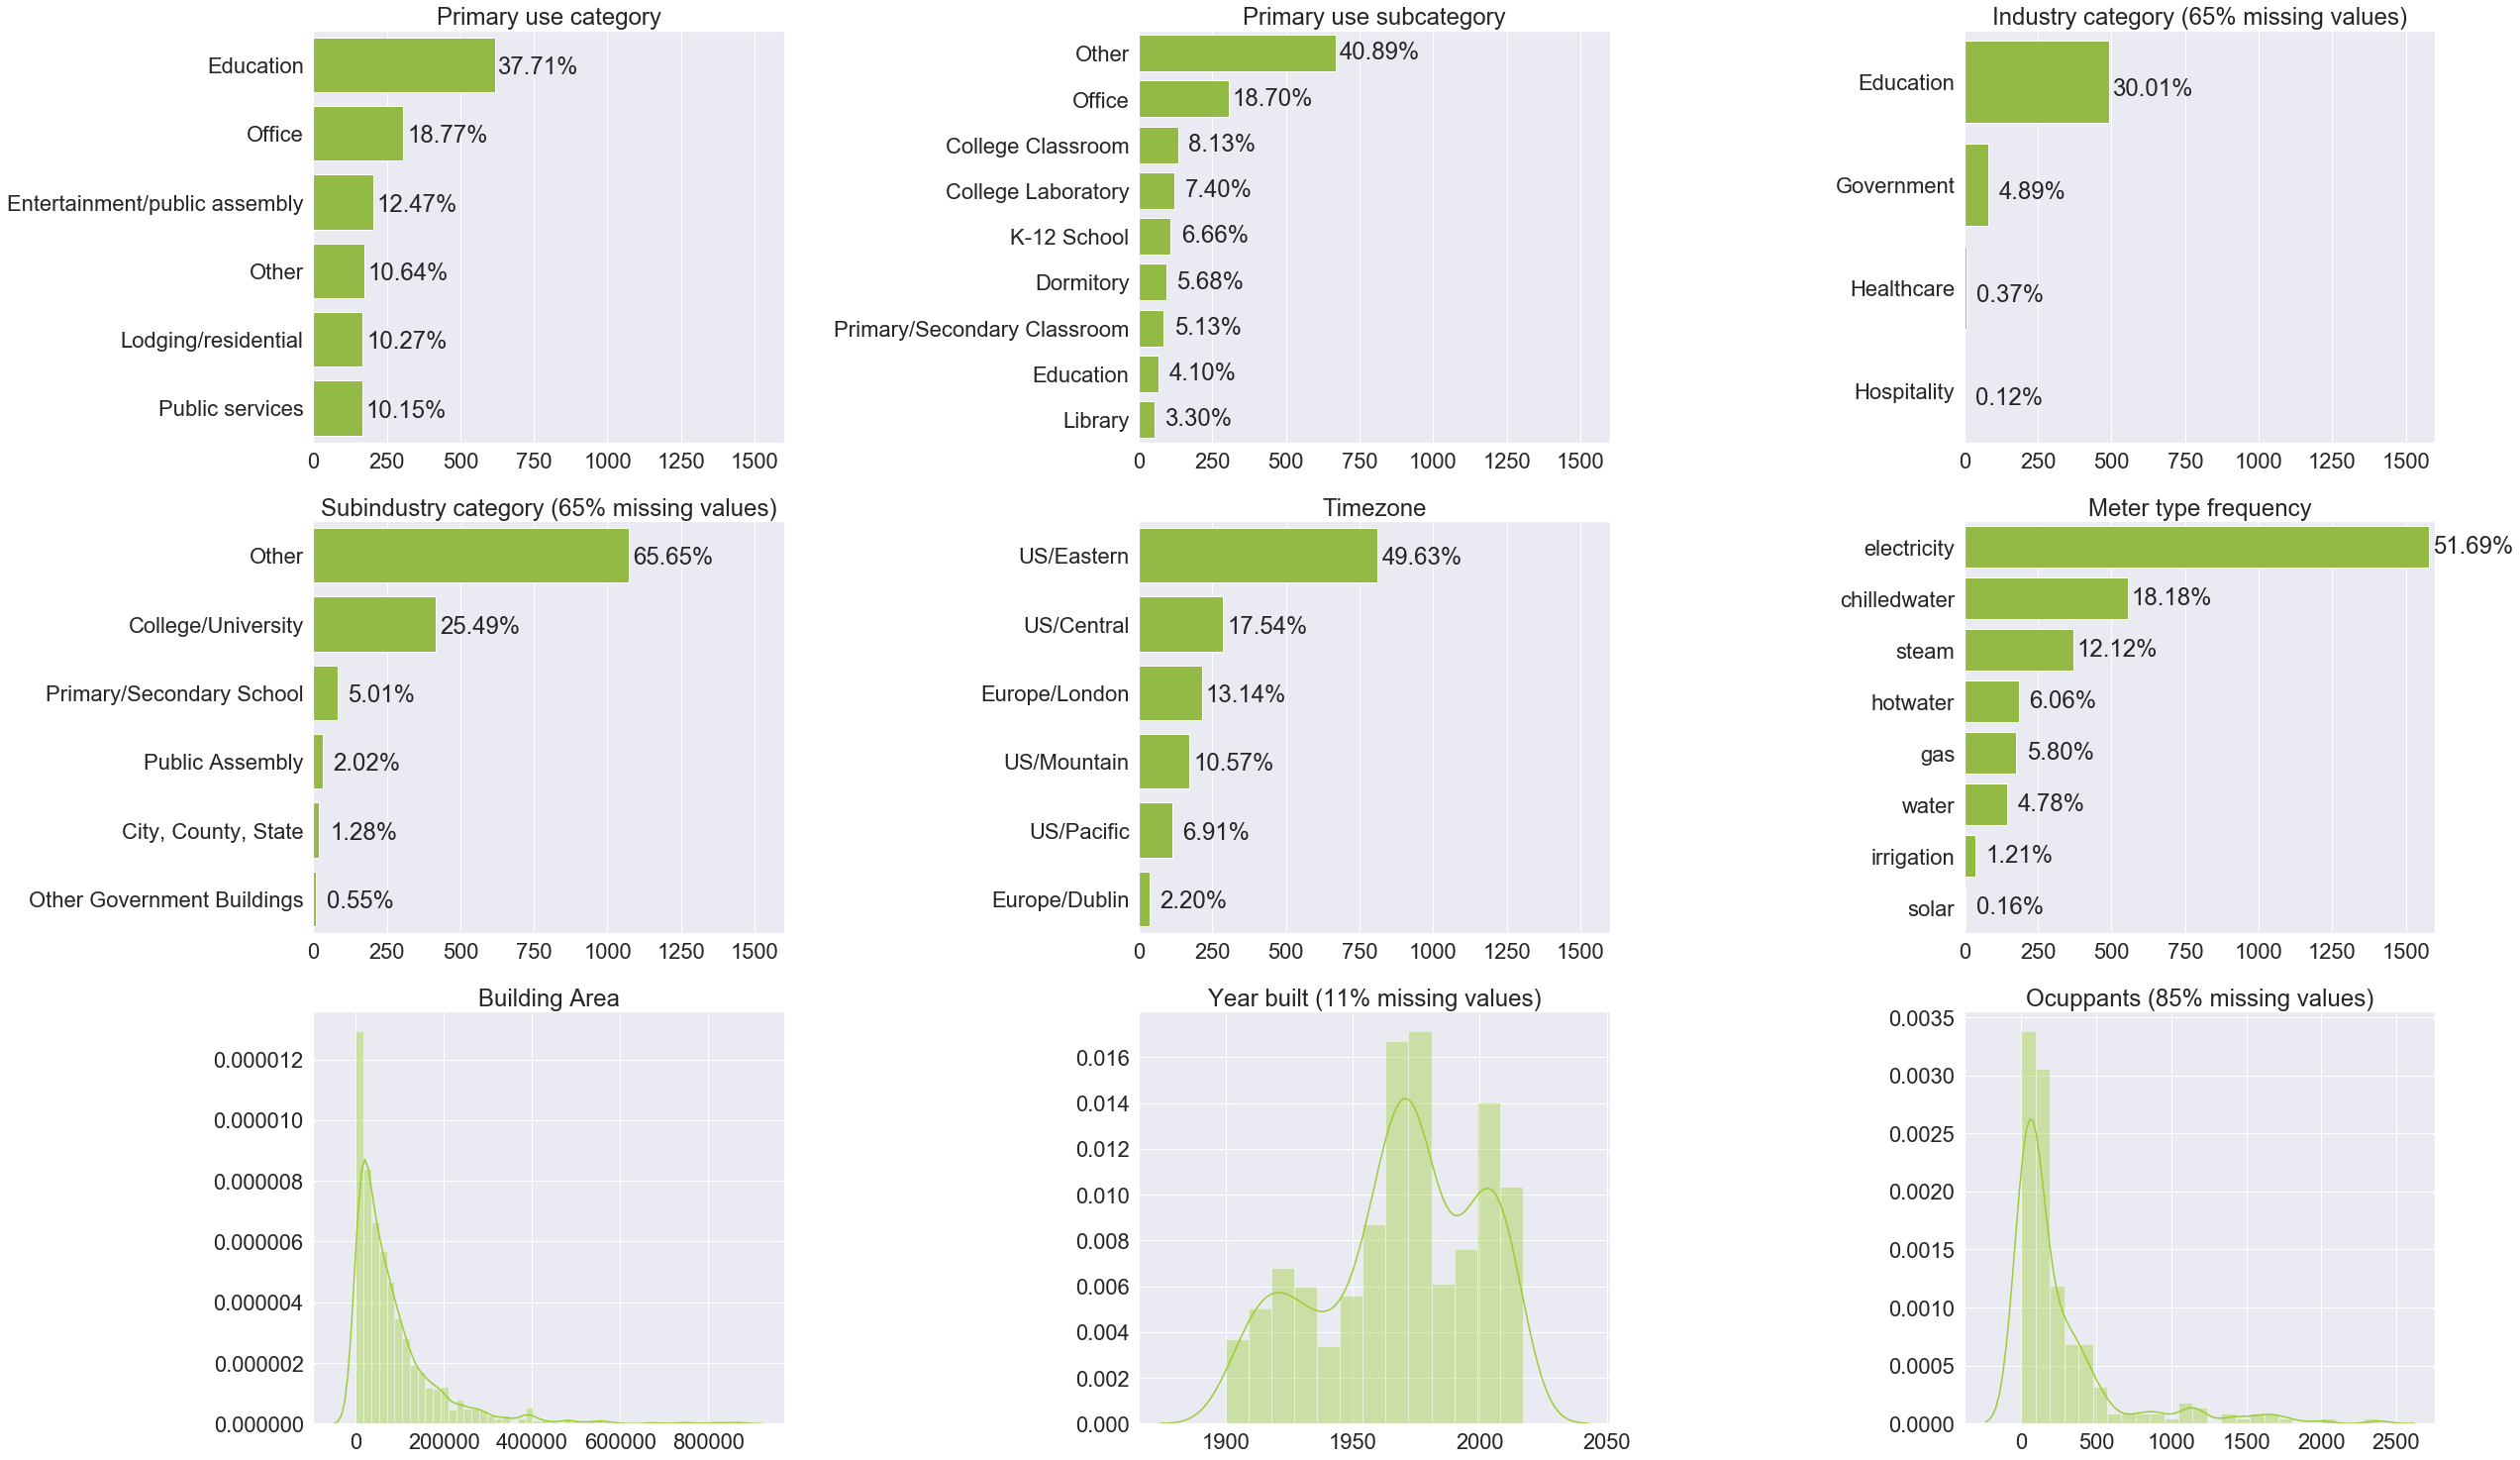

In [17]:
sns.set(rc={'figure.figsize':(36,21)})
sns.set(font_scale = 2)
f, axes = plt.subplots(3, 3)

axes = axes.flatten()

color = "yellowgreen"

# primary use category countplot in decreasing order
# Temporary dataset
top5 = list(metadata['primaryspaceusage'].value_counts().iloc[:5].index)
temp = metadata[["primaryspaceusage"]].copy()
temp.loc[temp.primaryspaceusage.isin(top5) == False, "primaryspaceusage"] = "Other"
# Plot
ax1 = axes[0]
g1 = sns.countplot(data=temp, y="primaryspaceusage", color= color, orient="h", ax=ax1, order = temp['primaryspaceusage'].value_counts().index)
ax1.title.set_text('Primary use category')
ax1.set(ylabel="", xlabel="", xlim=(0,1600))
# adds percentage    
total = float(len(metadata)) # number of buildings
for p in g1.patches:
    width = p.get_width()
    g1.text(width + 150,
            p.get_y() + p.get_height()/1.5,
            '{:1.2%}'.format(width/total),
            ha="center") 
del(top5, temp)
    
# primary use subcategory countplot in decreasing order
# Temporary dataset
top5 = list(metadata['sub_primaryspaceusage'].value_counts().iloc[:8].index)
temp = metadata[["sub_primaryspaceusage"]].copy()
temp.loc[temp.sub_primaryspaceusage.isin(top5) == False, "sub_primaryspaceusage"] = "Other"
# Plot
ax2 = axes[1]
g2 = sns.countplot(data=temp, y="sub_primaryspaceusage", color= color, orient="h", ax=ax2, order = temp['sub_primaryspaceusage'].value_counts().iloc[:16].index)
ax2.title.set_text('Primary use subcategory')
ax2.set(ylabel="", xlabel="", xlim=(0,1600))
# adds percentage    
total = float(len(metadata)) # number of buildings
for p in g2.patches:
    width = p.get_width()
    g2.text(width + 150,
            p.get_y() + p.get_height()/1.5,
            '{:1.2%}'.format(width/total),
            ha="center") 
del(top5, temp)

# industry countplot in decreasing order
ax3 = axes[2]
g3 = sns.countplot(data=metadata, y="industry", color=color, ax=ax3, orient="h", order = metadata['industry'].value_counts().index)
ax3.title.set_text('Industry category (65% missing values)')
ax3.set(ylabel="", xlabel="", xlim=(0,1600))
# adds percentage    
total = float(len(metadata)) # number of buildings
for p in g3.patches:
    width = p.get_width()
    g3.text(width + 150,
            p.get_y() + p.get_height()/1.5,
            '{:1.2%}'.format(width/total),
            ha="center") 
    
# subindustry countplot in decreasing order
# Temporary dataset
top5 = list(metadata['subindustry'].value_counts().iloc[:5].index)
temp = metadata[["subindustry"]].copy()
temp.loc[temp.subindustry.isin(top5) == False, "subindustry"] = "Other"
# Plot
ax4 = axes[3]
g4 = sns.countplot(data=temp, y="subindustry", color=color, ax=ax4, orient="h", order = temp['subindustry'].value_counts().index)
ax4.title.set_text('Subindustry category (65% missing values)')
ax4.set(ylabel="", xlabel="", xlim=(0,1600))
# adds percentage    
total = float(len(metadata)) # number of buildings
for p in g4.patches:
    width = p.get_width()
    g4.text(width + 150,
            p.get_y() + p.get_height()/1.5,
            '{:1.2%}'.format(width/total),
            ha="center") 
del(top5, temp)

# timezone countplot in decreasing order
ax5 = axes[4]
g5 = sns.countplot(data=metadata, y="timezone", color=color, ax=ax5, orient="h", order = metadata['timezone'].value_counts().index)
ax5.title.set_text('Timezone')
ax5.set(ylabel="", xlabel="", xlim=(0,1600))
# adds percentage    
total = float(len(metadata)) # number of buildings
for p in g5.patches:
    width = p.get_width()
    g5.text(width + 150,
            p.get_y() + p.get_height()/1.5,
            '{:1.2%}'.format(width/total),
            ha="center") 
    
# Meters type frequency
ax6 = axes[5]
# Temporal datafram
temp = pd.melt(metadata[["building_id","electricity","hotwater","chilledwater","steam","water","irrigation","gas","solar"]],id_vars = "building_id", var_name="meter")
# plot
g6 = sns.countplot(data=temp.loc[temp['value']=="Yes"], y='meter', color= color, ax=ax6, orient="h", order = temp.loc[temp['value']=="Yes"]["meter"].value_counts().index)
g6.title.set_text('Meter type frequency')
g6.set(ylabel="", xlabel="", xlim=(0,1600))
# adds percentage    
total = temp.loc[temp['value']=="Yes"]["value"].value_counts()[0] # number of meters
for p in g6.patches:
    width = p.get_width()
    g6.text(width + 150,
            p.get_y() + p.get_height()/1.5,
            '{:1.2%}'.format(width/total),
            ha="center")    
del(temp)
    
# "sqft" histogram
ax7 = axes[6]
g7 = sns.distplot(metadata["sqft"], ax=ax7, color=color)
g7.set(ylabel="", xlabel="")
ax7.set_title('Building Area')

# "yearbuilt" histogram
ax8 = axes[7]
g8 = sns.distplot(metadata["yearbuilt"].dropna(), ax=ax8, color=color)
g8.set(ylabel="", xlabel="")
ax8.set_title('Year built (11% missing values)')

# "occupants" histogram
ax9 = axes[8]
g9 = sns.distplot(metadata["occupants"].dropna(), ax=ax9, color=color)
g9.set(ylabel="", xlabel="")
ax9.set_title('Ocuppants (85% missing values)')
   
plt.tight_layout()

In [ ]:
f.savefig("..\\figures\\metadata_features.pdf", bbox_inches='tight')
f.savefig("..\\figures\\metadata_features.png", bbox_inches='tight')

### Number of buildings in each site

In [18]:
metadata.groupby("site_id").building_id.count()

site_id
Bear         92
Bobcat       36
Bull        124
Cockatoo    124
Crow          5
Eagle        47
Fox         137
Gator        74
Hog         163
Lamb        147
Moose        15
Mouse         7
Panther     136
Peacock     106
Rat         305
Robin        52
Shrew         9
Swan         21
Wolve        36
Name: building_id, dtype: int64

### Number of meters per site

In [19]:
temp = pd.melt(metadata[["site_id","electricity","hotwater","chilledwater","steam","water","irrigation","gas","solar"]],id_vars = "site_id", var_name="meter")

In [20]:
bysite = temp[temp.value == "Yes"].groupby(["site_id","meter"]).count().groupby("site_id").sum()
bysite

,value
site_id,
Bear,92
Bobcat,116
Bull,308
Cockatoo,282
Crow,15
Eagle,106
Fox,306
Gator,74
Hog,336


In [22]:
bysite.value.sum()

3053

In [23]:
print("Total number of meters: " + str(len(temp.dropna())))

Total number of meters: 3053
